In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
sp_price = pd.read_csv('./SP500.csv', index_col=0, parse_dates=True)

              Close    Return
Date                         
2019-09-27  2961.79 -0.531633
2019-09-30  2976.74  0.504762
2019-10-01  2940.25 -1.225838
2019-10-02  2887.61 -1.790324
2019-10-03  2910.63  0.797199
2019-10-04  2952.01  1.421685
2019-10-07  2938.79 -0.447830
2019-10-08  2893.06 -1.556083
2019-10-09  2919.40  0.910455
2019-10-10  2938.13  0.641570


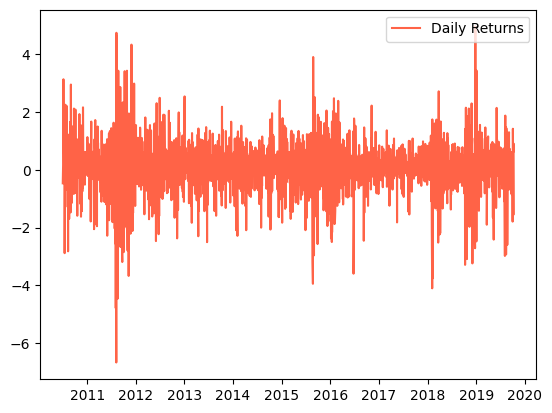

In [4]:
# Calculate daily returns as percentage price changes
sp_price['Return'] = 100 * (sp_price['Close'].pct_change())

# View the data
print(sp_price.tail(10))

# plot the data
plt.plot(sp_price['Return'], color = 'tomato', label = 'Daily Returns')
plt.legend(loc='upper right')
plt.show()

In [8]:
sp_price

,Close,Return
Date,,
2010-07-01,1027.37,NaN
2010-07-02,1022.58,-0.466239
2010-07-06,1028.06,0.535899
2010-07-07,1060.27,3.133086
2010-07-08,1070.24,0.940327
...,...,...
2019-10-04,2952.01,1.421685
2019-10-07,2938.79,-0.447830
2019-10-08,2893.06,-1.556083


In [9]:
sp_data = sp_price.copy()

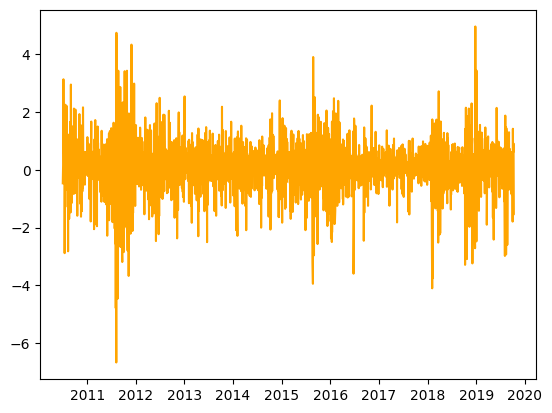

Daily volatility:  0.92%


In [10]:
# Plot the price returns
plt.plot(sp_data['Return'], color = 'orange')
plt.show()

# Calculate daily std of returns
std_daily = sp_data['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

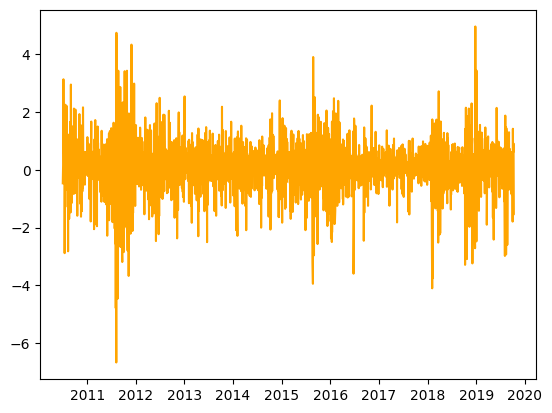

Daily volatility:  0.92%
Monthly volatility:  4.20%
Annual volatility:  14.55%


In [12]:
# Plot the price returns
plt.plot(sp_data['Return'], color = 'orange')
plt.show()
import math

# Calculate daily std of returns
std_daily = sp_data['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

# Convert daily volatility to monthly volatility
std_monthly = math.sqrt(21) * std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
std_annual = math.sqrt(252) * std_daily
print ('Annual volatility: ', '{:.2f}%'.format(std_annual))

Terrific job! Notice the market is indeed risky. Annualized S&P 500 volatility indicates actual S&P 500 returns can fluctuate over 10% around the mean return.

In [14]:
def simulate_GARCH(n, omega, alpha, beta = 0):
    np.random.seed(4)
    # Initialize the parameters
    white_noise = np.random.normal(size = n)
    resid = np.zeros_like(white_noise)
    variance = np.zeros_like(white_noise)
    
    for t in range(1, n):
        # Simulate the variance (sigma squared)
        variance[t] = omega + alpha * resid[t-1]**2 + beta * variance[t-1]
        # Simulate the residuals
        resid[t] = np.sqrt(variance[t]) * white_noise[t]    
    
    return resid, variance

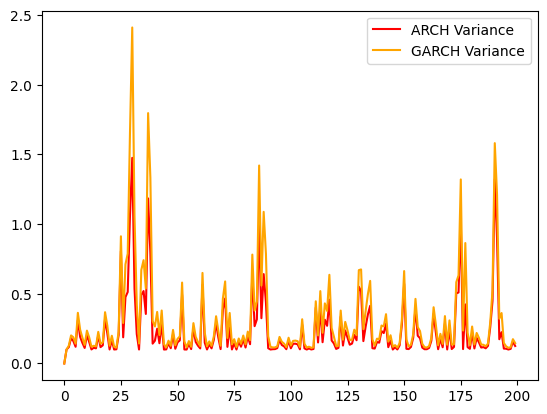

In [15]:
# Simulate a ARCH(1) series

arch_resid, arch_variance = simulate_GARCH(n= 200, 
                                           omega = 0.1, alpha = 0.7)
# Simulate a GARCH(1,1) series
garch_resid, garch_variance = simulate_GARCH(n= 200, 
                                             omega = 0.1, alpha = 0.7, 
                                             beta = 0.1)
# Plot the ARCH variance
plt.plot(arch_variance, color = 'red', label = 'ARCH Variance')
# Plot the GARCH variance
plt.plot(garch_variance, color = 'orange', label = 'GARCH Variance')
plt.legend()
plt.show()

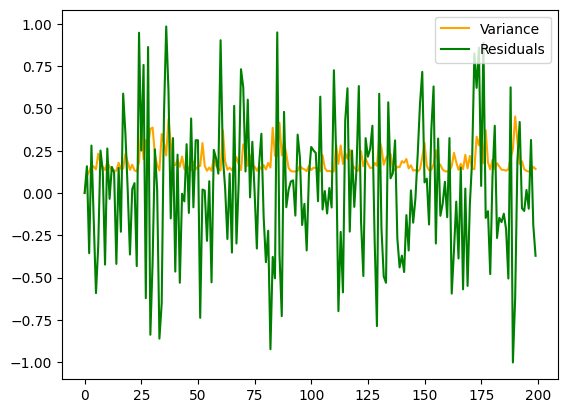

In [16]:
# First simulated GARCH
sim_resid, sim_variance = simulate_GARCH(n = 200,  omega = 0.1, 
                                          alpha = 0.3, beta = 0.2)
plt.plot(sim_variance, color = 'orange', label = 'Variance')
plt.plot(sim_resid, color = 'green', label = 'Residuals')
plt.legend(loc='upper right')
plt.show()

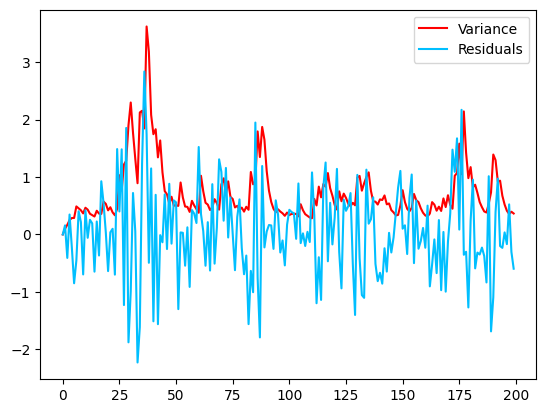

In [17]:
# Second simulated GARCH
sim_resid, sim_variance = simulate_GARCH(n = 200,  omega = 0.1, 
                                          alpha = 0.3, beta = 0.6)
plt.plot(sim_variance, color = 'red', label = 'Variance')
plt.plot(sim_resid, color = 'deepskyblue', label = 'Residuals')
plt.legend(loc='upper right')
plt.show()

In [20]:
# !pip install arch

In [24]:
from arch import arch_model
# Specify GARCH model assumptions
basic_gm = arch_model(sp_data['Return'].dropna(), p=1, q=1,
                      mean='constant', vol='GARCH', dist='normal')
# Fit the model
gm_result = basic_gm.fit(update_freq=4)


Iteration:      4,   Func. Count:     29,   Neg. LLF: 3798.073437458679
Iteration:      8,   Func. Count:     53,   Neg. LLF: 2783.7850577869744
Iteration:     12,   Func. Count:     75,   Neg. LLF: 2770.082165044828
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2770.082165044828
            Iterations: 13
            Function evaluations: 79
            Gradient evaluations: 13


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2770.08
Distribution:                  Normal   AIC:                           5548.16
Method:            Maximum Likelihood   BIC:                           5571.19
                                        No. Observations:                 2335
Date:                Sat, Dec 02 2023   Df Residuals:                     2334
Time:                        23:27:00   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0772  1.444e-02      5.346  8.990e-08 [4.891e-0

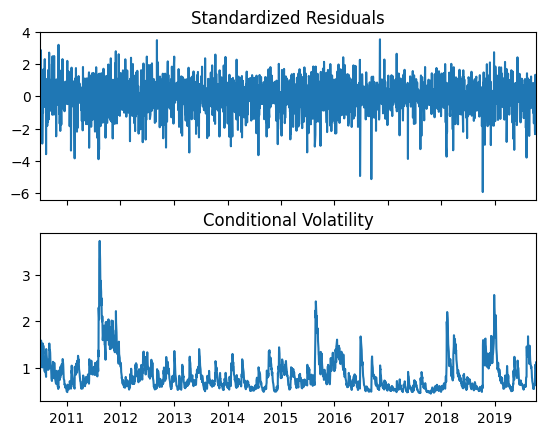

In [25]:

# Display model fitting summary
print(gm_result.summary())

# Plot fitted results
gm_result.plot()
plt.show()

In [26]:
# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'].dropna(), p = 1, q = 1, 
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit()

# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)

# Print the forecast variance
print(gm_forecast.variance[-1:])

Iteration:      1,   Func. Count:      6,   Neg. LLF: 20021.465944394076
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1457433.8990556663
Iteration:      3,   Func. Count:     23,   Neg. LLF: 2886.600579133578
Iteration:      4,   Func. Count:     29,   Neg. LLF: 3798.073437458679
Iteration:      5,   Func. Count:     35,   Neg. LLF: 2909.747941808212
Iteration:      6,   Func. Count:     41,   Neg. LLF: 2779.3643008068457
Iteration:      7,   Func. Count:     47,   Neg. LLF: 5552.842057321014
Iteration:      8,   Func. Count:     53,   Neg. LLF: 2783.7850577869744
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2771.0217706939475
Iteration:     10,   Func. Count:     65,   Neg. LLF: 2770.082392571153
Iteration:     11,   Func. Count:     70,   Neg. LLF: 2770.0821660473393
Iteration:     12,   Func. Count:     75,   Neg. LLF: 2770.082165044828
Iteration:     13,   Func. Count:     79,   Neg. LLF: 2770.0821650451053
Optimization terminated successfully    (Exit mode 0)
   